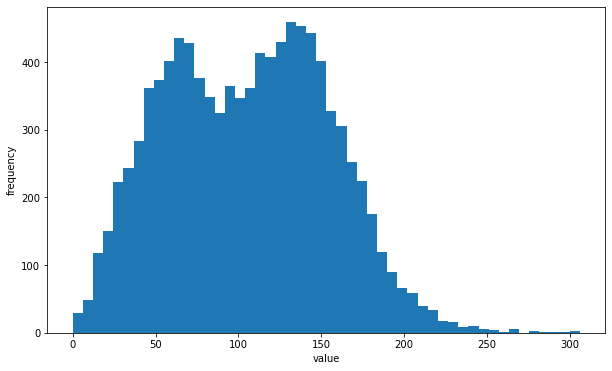

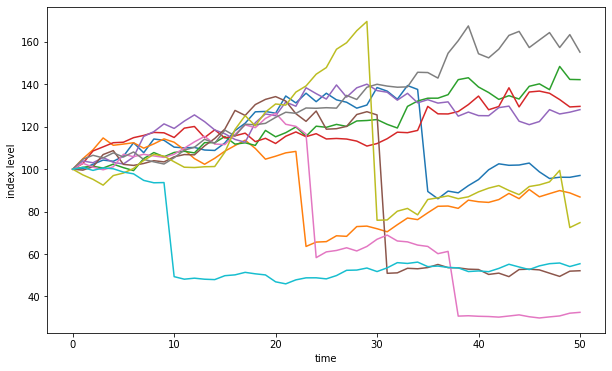

In [2]:
import scipy.stats as scs
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75       #The jump intensity.
mu = -0.6         #The mean jump size.
delta = 0.25      #The jump volatility.
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)    #The drift correction.

T = 1.0
M = 50
I = 10000
dt = T / M

'''
This time, three sets of random numbers are needed. Notice in Figure 12-13 the sec‐
ond peak (bimodal frequency distribution), which is due to the jumps
'''

S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I)) #Standard normally distributed random numbers.
sn2 = npr.standard_normal((M + 1, I)) #Standard normally distributed random numbers.
poi = npr.poisson(lamb * dt, (M + 1, I)) #Poisson distributed random numbers.

for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +  #Simulation based on the exact Euler scheme.
                              sigma * math.sqrt(dt) * sn1[t]) +
                       (np.exp(mu + delta * sn2[t]) - 1) * 
                       poi[t]) 
    S[t] = np.maximum(S[t], 0)
    
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

'''
The negative jumps can also be spotted in the first 10 simulated index level paths, as
presented in Figure 12-14
'''

plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');
